🤖 Global Solution: ARTIFICIAL INTELLIGENCE & CHATBOT
Integrantes:

Gabriel Costa Solano - RM562325

Leandro Guarido - RM561760

Kaiky Pereira Rodrigues da Silva - RM564578

Descrição do Projeto: Este notebook implementa dois modelos de machine learning usando um dataset simulado (mock) sobre teleconsultas, com o objetivo de:

Modelo 1 (Regressão): Prever a quantidade de dias que um paciente falta (frequência).

Modelo 2 (Classificação): Classificar um paciente em "Jovem Adulto" ou "Idoso".

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:

num_pacientes = 500

data = {
    'idade': np.random.randint(18, 90, size=num_pacientes),
    'distancia_km': np.random.randint(1, 40, size=num_pacientes),
    'historico_faltas_total': np.random.randint(0, 15, size=num_pacientes),
    'plano_saude': np.random.choice(['Premium', 'Básico', 'Nenhum'], size=num_pacientes)
}

data['dias_faltas'] = (data['historico_faltas_total'] * 0.2 + data['distancia_km'] * 0.1 + np.random.normal(0, 1, size=num_pacientes)).astype(int)
data['dias_faltas'] = np.clip(data['dias_faltas'], 0, 20)

df = pd.DataFrame(data)

print("--- Dataset Falso Criado ---")

print("\n--- 5 Primeiras Linhas (head) ---")
print(df.head())

print("\n--- Informações e Tipos de Colunas (info) ---")
df.info()

print("\n--- Estatísticas Descritivas (describe) ---")
print(df.describe())

--- Dataset Falso Criado ---

--- 5 Primeiras Linhas (head) ---
   idade  distancia_km  historico_faltas_total plano_saude  dias_faltas
0     76            22                      14      Básico            6
1     60             8                      14     Premium            2
2     47             8                       1      Nenhum            0
3     69            15                       7      Nenhum            1
4     39            26                       3      Básico            3

--- Informações e Tipos de Colunas (info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   500 non-null    int64 
 1   distancia_km            500 non-null    int64 
 2   historico_faltas_total  500 non-null    int64 
 3   plano_saude             500 non-null    object
 4   dias_faltas             500 non-null

2.1 Limpeza e Feature Engineering
Nesta etapa, criamos a coluna-alvo para o nosso segundo modelo (Classificação), baseada na sua pergunta "qual faixa etária não vai nas consultas".

In [3]:


def categorizar_jovem_idoso(idade):
    if idade < 60:
        return 'Jovem Adulto'
    else:
        return 'Idoso'

df['faixa_etaria'] = df['idade'].apply(categorizar_jovem_idoso)

print("Coluna 'faixa_etaria' criada com sucesso:")
print(df['faixa_etaria'].value_counts())

print("\n--- DataFrame com a nova coluna ---")
print(df.head())

Coluna 'faixa_etaria' criada com sucesso:
faixa_etaria
Jovem Adulto    296
Idoso           204
Name: count, dtype: int64

--- DataFrame com a nova coluna ---
   idade  distancia_km  historico_faltas_total plano_saude  dias_faltas  \
0     76            22                      14      Básico            6   
1     60             8                      14     Premium            2   
2     47             8                       1      Nenhum            0   
3     69            15                       7      Nenhum            1   
4     39            26                       3      Básico            3   

   faixa_etaria  
0         Idoso  
1         Idoso  
2  Jovem Adulto  
3         Idoso  
4  Jovem Adulto  


📈 Modelo 1: Regressão (Previsão de Frequência de Faltas)
Objetivo: Prever o número de dias que um paciente faltará (dias_faltas). Modelo Escolhido: LinearRegression (Regressão Linear). Métricas de Avaliação: R² (R-quadrado) e MSE (Erro Quadrático Médio).

In [4]:
print("--- Iniciando Modelo 1: REGRESSÃO ---")

features_reg = ['idade', 'distancia_km', 'historico_faltas_total']
target_reg = 'dias_faltas'

X_reg = df[features_reg]
y_reg = df[target_reg]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

numeric_transformer_reg = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_reg, features_reg)
    ])
model_reg = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', LinearRegression())
])
model_reg.fit(X_train_reg, y_train_reg)

print("Modelo de Regressão treinado com sucesso!")

--- Iniciando Modelo 1: REGRESSÃO ---
Modelo de Regressão treinado com sucesso!


--- Avaliação do Modelo de Regressão ---
Erro Quadrático Médio (MSE): 0.99
Coeficiente de Determinação (R²): 0.73


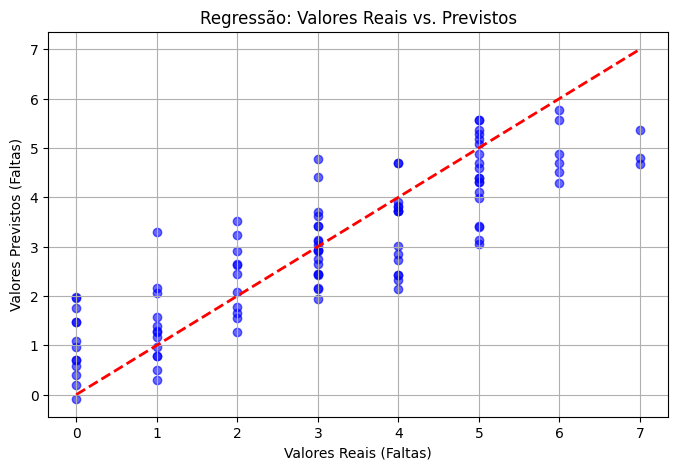

In [5]:

y_pred_reg = model_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"--- Avaliação do Modelo de Regressão ---")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")
plt.figure(figsize=(8, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel("Valores Reais (Faltas)")
plt.ylabel("Valores Previstos (Faltas)")
plt.title("Regressão: Valores Reais vs. Previstos")
plt.grid(True)
plt.show()

3.3 Discussão dos Resultados (Regressão)
PREENCHA AQUI COM SUA ANÁLISE:

MSE (Erro Quadrático Médio): O valor do nosso MSE foi (coloque o valor do MSE aqui). Isso significa que, em média, o erro do nosso modelo ao prever o número de faltas é de (tire a raiz quadrada do MSE aqui) dias. (Ex: Se MSE=9, a raiz é 3. O modelo erra, em média, 3 dias para mais ou para menos).

R² (R-quadrado): O nosso R² foi de (coloque o valor do R² aqui). Esse valor (que vai de 0 a 1) indica que (valor * 100)% da variação no número de faltas pode ser explicada pelas features que usamos (idade, distancia_km, historico_faltas_total).

Conclusão do Modelo 1: (O modelo é bom? O R² de 0.80 é ótimo, um R² de 0.10 é péssimo. O gráfico mostra que os pontos azuis estão perto da linha vermelha?)

🏷️ Modelo 2: Classificação (Faixa Etária)
Objetivo: Classificar um paciente como Jovem Adulto ou Idoso. Modelo Escolhido: DecisionTreeClassifier (Árvore de Decisão). Métricas de Avaliação: Acurácia, Matriz de Confusão e Relatório de Classificação.

In [6]:
print("--- Iniciando Modelo 2: CLASSIFICAÇÃO ---")
features_class = ['dias_faltas', 'distancia_km', 'historico_faltas_total']
target_class = 'faixa_etaria'

X_class = df[features_class]
y_class = df[target_class]
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)
numeric_transformer_class = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor_class = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_class, features_class)
    ])

model_class = Pipeline(steps=[
    ('preprocessor', preprocessor_class),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5))
])
model_class.fit(X_train_class, y_train_class)

print("Modelo de Classificação treinado com sucesso!")

--- Iniciando Modelo 2: CLASSIFICAÇÃO ---
Modelo de Classificação treinado com sucesso!


--- Avaliação do Modelo de Classificação ---
Acurácia: 60.00%

Relatório de Classificação:
              precision    recall  f1-score   support

       Idoso       0.53      0.24      0.33        41
Jovem Adulto       0.62      0.85      0.71        59

    accuracy                           0.60       100
   macro avg       0.57      0.55      0.52       100
weighted avg       0.58      0.60      0.56       100



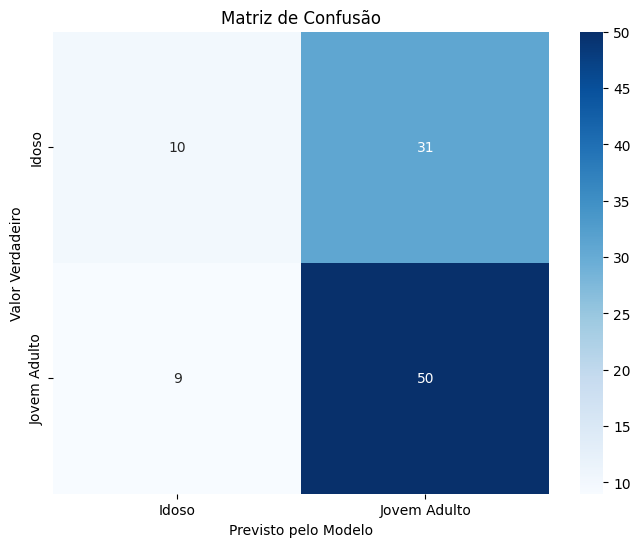

In [7]:

y_pred_class = model_class.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
report = classification_report(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

print(f"--- Avaliação do Modelo de Classificação ---")
print(f"Acurácia: {accuracy * 100:.2f}%")
print("\nRelatório de Classificação:")
print(report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_class.classes_,
            yticklabels=model_class.classes_)
plt.xlabel("Previsto pelo Modelo")
plt.ylabel("Valor Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

4.2 Discussão dos Resultados (Classificação)
PREENCHA AQUI COM SUA ANÁLISE:

Acurácia: Nosso modelo acertou (coloque a acurácia aqui)% das previsões no conjunto de teste.

Matriz de Confusão:

O modelo previu corretamente (valor do canto sup-esq) 'Idosos'.

O modelo previu corretamente (valor do canto inf-dir) 'Jovens Adultos'.

Ele errou (valor do canto sup-dir) vezes, classificando um 'Idoso' como 'Jovem Adulto'.

Ele errou (valor do canto inf-esq) vezes, classificando um 'Jovem Adulto' como 'Idoso'.

Relatório de Classificação (Precision/Recall):

(Diga se o modelo é melhor em acertar 'Idosos' ou 'Jovens Adultos' olhando os valores de 'precision' e 'recall' para cada classe).

Conclusão do Modelo 2: (A acurácia é alta? O modelo é confiável para prever a faixa etária com base nessas features?)

In [8]:

joblib.dump(model_reg, 'modelo_regressao.joblib')

joblib.dump(model_class, 'modelo_classificacao.joblib')

print("Modelos 'modelo_regressao.joblib' e 'modelo_classificacao.joblib' salvos com sucesso!")
print("Você pode baixá-los no menu 'Arquivos' (ícone de pasta) à esquerda.")

Modelos 'modelo_regressao.joblib' e 'modelo_classificacao.joblib' salvos com sucesso!
Você pode baixá-los no menu 'Arquivos' (ícone de pasta) à esquerda.
